In [18]:
import pennylane as qml
from pennylane import numpy as np

# Define the number of qubits and the device
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# Define the quantum circuit
@qml.qnode(dev, diff_method="parameter-shift")
def circuit(theta):
    with qml.tape.QuantumTape() as tape:
        qml.RX(theta[0], wires=0)
        qml.RY(theta[1], wires=1)
        qml.CNOT(wires=[0, 1])
    return qml.matrix(tape)

# Initialize parameters
theta = np.array([0.5, 0.1], requires_grad=True)
circuit(theta)

ValueError: wire_order is required by qml.matrix() for tapes with more than one wire.

In [15]:
import pennylane as qml
from pennylane import numpy as np

# Define the number of qubits and the device
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# Define the quantum circuit
@qml.qnode(dev, diff_method="parameter-shift")
def circuit(theta):
    # Apply the parameterized unitary U(theta)
    qml.RX(theta[0], wires=0)
    qml.RY(theta[1], wires=1)
    qml.CNOT(wires=[0, 1])
    # Return probabilities of all computational basis states
    return qml.probs(wires=[0, 1])

# Define the cost function
def cost(theta):
    # Get the probabilities from the quantum circuit
    probs = circuit(theta)
    # Extract p_0 (probability of |00>)
    p_0 = probs[0]
    # Compute the cost function
    return 1 - p_0

# Initialize parameters
theta = np.array([0.5, 0.1], requires_grad=True)

# Compute the gradient of the cost function w.r.t. theta
grad_fn = qml.grad(func = cost)

steps = 100
costs = []
for i in range(steps):
	gradient = grad_fn(theta)
	theta = theta - 0.1 * gradient
	costs.append(cost(theta))
print("Theta:", theta)
print("Gradient:", gradient)


Theta: [0.0030328  0.00061315]
Gradient: [0.00159621 0.00032271]


In [17]:
costs[-1]

2.3934557213944885e-06

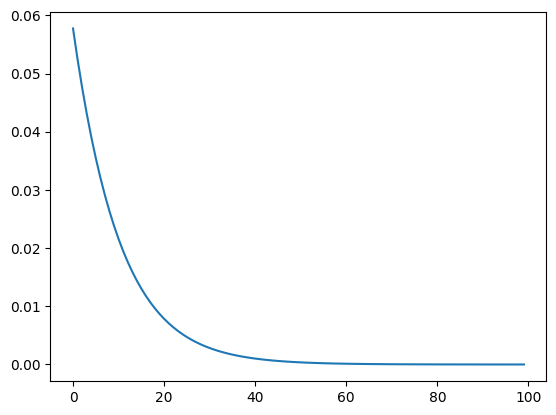

In [16]:
import matplotlib.pyplot as plt
plt.plot(costs)

In [30]:
import pennylane as qml
from pennylane import numpy as np

# Define the number of qubits and the device
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# Define the quantum circuit
@qml.qnode(dev)
def circuit(theta):
    # Apply the parameterized unitary U(theta)
    qml.RX(theta[0], wires=0)
    qml.RY(theta[1], wires=1)
    qml.CNOT(wires=[0, 1])
    # Return probabilities of all computational basis states
    return qml.probs(wires=[0, 1])

# Define the cost function
def cost(theta):
    # Get the probabilities from the quantum circuit
    probs = circuit(theta)
    # Extract p_0 (probability of |00>)
    p_0 = probs[0]
    # Compute the cost function
    return p_0**2 - 1

# Parameter-shift rule implementation
def parameter_shift_gradient(cost_fn, theta, idx):
    """Compute the gradient of the cost function with respect to a single parameter using the parameter-shift rule."""
    shifted = theta.copy()
    
    # Shift parameter by +pi/2
    shifted[idx] += np.pi / 2
    forward = cost_fn(shifted)
    
    # Shift parameter by -pi/2
    shifted[idx] -= np.pi
    backward = cost_fn(shifted)
    
    # Compute gradient using the parameter-shift rule
    return (forward - backward) / 2

# Full gradient computation
def compute_full_gradient(cost_fn, theta):
    gradients = np.zeros_like(theta)
    for i in range(len(theta)):
        gradients[i] = parameter_shift_gradient(cost_fn, theta, i)
    return gradients

# Initialize parameters
theta = np.array([0.5, 0.1], requires_grad=False)

# Compute the gradient using the parameter-shift rule
gradient = compute_full_gradient(cost, theta)

print("Theta:", theta)
print("Gradient:", gradient)


Theta: [0.5 0.1]
Gradient: [-0.2385167  -0.04399305]
